<a href="https://colab.research.google.com/github/wahyuusuryaa/ta-dataset-ukiran-bali/blob/main/cnn_mobilenetv2_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/wahyuusuryaa/ta-dataset-ukiran-bali.git

Cloning into 'ta-dataset-ukiran-bali'...
remote: Enumerating objects: 253, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 253 (delta 1), reused 61 (delta 1), pack-reused 192
Receiving objects: 100% (253/253), 522.51 MiB | 38.56 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Updating files: 100% (216/216), done.


In [2]:
import tensorflow as tf
import keras

print("Versi TensorFlow:", tf.__version__)
print("Versi Keras:", keras.__version__)

Versi TensorFlow: 2.15.0
Versi Keras: 2.15.0


In [3]:
!pip install Augmentor

In [4]:
import os
import Augmentor

def apply_data_augmentation(input_folder, output_folder, num_augmented_images_per_category):
    # Membuat folder output jika belum ada
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Daftar kategori yang ada
    categories = ['kekarangan_boma', 'kekarangan_bunga', 'kekarangan_gajah', 'kekarangan_goak', 'kekarangan_tapel', 'keketusan_batu_batuan', 'keketusan_kakul_kakulan', 'keketusan_mas_masan', 'keketusan_mote_motean', 'patra_banci', 'patra_mesir', 'patra_pipid', 'patra_samblung', 'patra_sari']

    # Looping untuk setiap kategori
    for category in categories:
        # Membuat folder baru di dalam folder kategori
        output_category_folder = os.path.join(output_folder, category)
        if not os.path.exists(output_category_folder):
            os.makedirs(output_category_folder)

        # Memastikan direktori sumber ada
        input_category_folder = os.path.join(input_folder, category)
        if os.path.exists(input_category_folder):
            # Inisialisasi objek pipeline Augmentor
            p = Augmentor.Pipeline(source_directory=input_category_folder, output_directory=output_category_folder)

            # Tambahkan operasi data augmentation yang diinginkan
            p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
            p.flip_left_right(probability=0.5)
            p.flip_top_bottom(probability=0.5)
            p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)

            # Generate data augmented
            p.sample(num_augmented_images_per_category)
        else:
            print(f"Direktori sumber {input_category_folder} tidak ditemukan. Melanjutkan ke kategori berikutnya.")
            continue

# Contoh penggunaan
input_folder = '/content/ta-dataset-ukiran-bali'
output_folder = '/content/ta-dataset-ukiran-bali/augmented'
num_augmented_images_per_category = 100 # Jumlah gambar yang akan diaugmentasi untuk setiap kategori

apply_data_augmentation(input_folder, output_folder, num_augmented_images_per_category)

Initialised with 30 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/kekarangan_boma.

Processing <PIL.Image.Image image mode=RGB size=3072x3072 at 0x78348D8EB6D0>: 100%|██████████| 100/100 [01:12<00:00,  1.37 Samples/s]


Initialised with 7 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/kekarangan_bunga.

Processing <PIL.Image.Image image mode=RGB size=1181x734 at 0x78348D8B56F0>: 100%|██████████| 100/100 [00:42<00:00,  2.35 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/kekarangan_gajah.

Processing <PIL.Image.Image image mode=RGB size=150x100 at 0x78348D90B700>: 100%|██████████| 100/100 [00:52<00:00,  1.89 Samples/s]


Initialised with 30 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/kekarangan_goak.

Processing <PIL.Image.Image image mode=RGB size=454x551 at 0x78348D9037C0>: 100%|██████████| 100/100 [00:52<00:00,  1.92 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/kekarangan_tapel.

Processing <PIL.Image.Image image mode=RGB size=150x100 at 0x78348D923370>: 100%|██████████| 100/100 [00:47<00:00,  2.10 Samples/s]


Initialised with 15 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/keketusan_batu_batuan.

Processing <PIL.Image.Image image mode=RGB size=4000x3000 at 0x78348D902CB0>: 100%|██████████| 100/100 [01:29<00:00,  1.11 Samples/s]


Initialised with 12 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/keketusan_mas_masan.

Processing <PIL.Image.Image image mode=RGB size=3072x3072 at 0x78348D923EE0>: 100%|██████████| 100/100 [01:39<00:00,  1.01 Samples/s]


Initialised with 14 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/keketusan_mote_motean.

Processing <PIL.Image.Image image mode=RGB size=150x100 at 0x78348D956920>: 100%|██████████| 100/100 [01:01<00:00,  1.62 Samples/s]


Initialised with 10 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/patra_banci.

Processing <PIL.Image.Image image mode=RGB size=3072x3072 at 0x78348D9632E0>: 100%|██████████| 100/100 [00:57<00:00,  1.73 Samples/s]


Initialised with 9 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/patra_mesir.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2928x912 at 0x78348D942C50>: 100%|██████████| 100/100 [00:43<00:00,  2.30 Samples/s]


Initialised with 8 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/patra_pipid.

Processing <PIL.Image.Image image mode=RGB size=3072x3072 at 0x78348D900D90>: 100%|██████████| 100/100 [01:16<00:00,  1.31 Samples/s]


Initialised with 7 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/patra_samblung.

Processing <PIL.Image.Image image mode=RGB size=150x100 at 0x78348D956AA0>: 100%|██████████| 100/100 [00:24<00:00,  4.03 Samples/s]


Initialised with 20 image(s) found.
Output directory set to /content/ta-dataset-ukiran-bali/augmented/patra_sari.

Processing <PIL.Image.Image image mode=RGB size=3072x3072 at 0x78348D938E80>: 100%|██████████| 100/100 [01:03<00:00,  1.57 Samples/s]


In [5]:
import os

def count_files_in_subfolders(directory):
    """
    Fungsi untuk menghitung jumlah file dalam semua sub-sub folder dalam direktori yang diberikan.

    Args:
    directory (str): Path ke direktori yang ingin dihitung jumlah file-nya.

    Returns:
    int: Jumlah total file dalam semua sub-sub folder.
    """
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Contoh penggunaan
augmented_folder_path = '/content/ta-dataset-ukiran-bali/augmented'
total_files = count_files_in_subfolders(augmented_folder_path)
print(f"Total file dalam sub-sub folder di {augmented_folder_path}: {total_files}")

Total file dalam sub-sub folder di /content/ta-dataset-ukiran-bali/augmented: 1400


In [6]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

img_size_224p = 224

path_train = '/content/ta-dataset-ukiran-bali/augmented'
categories = ['kekarangan_boma', 'kekarangan_bunga', 'kekarangan_gajah', 'kekarangan_goak', 'kekarangan_tapel', 'keketusan_batu_batuan', 'keketusan_kakul_kakulan', 'keketusan_mas_masan', 'keketusan_mote_motean', 'patra_banci', 'patra_mesir', 'patra_pipid', 'patra_samblung', 'patra_sari']

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img))
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_224p, img_size_224p))
            imageData.append([img_resize, class_num])
            print(f"Nama file: {img}")
            print(f"Kelas: {category}")
            print(f"Array citra: {img_resize}")
            print(f"Label: {class_num}")
            print("")

    return imageData

dataTrain = create_data_img(path_train)

random.seed(10)
random.shuffle(dataTrain)

Streaming output truncated to the last 5000 lines.

 [[ 91  80  78]
  [110 101 103]
  [ 50  43  50]
  ...
  [145 155 177]
  [146 154 175]
  [119 128 145]]

 [[142 130 129]
  [102  92  96]
  [ 68  61  69]
  ...
  [142 152 175]
  [125 133 154]
  [140 148 166]]]
Label: 13

Nama file: patra_sari_original_Patra_sari_013.jpg_35ca74d3-bd15-4f29-bc84-6228b83ef978.jpg
Kelas: patra_sari
Array citra: [[[ 25  32  42]
  [ 26  33  43]
  [ 20  27  37]
  ...
  [ 59  59  51]
  [ 67  63  54]
  [ 66  59  48]]

 [[ 19  29  37]
  [ 26  36  45]
  [ 23  33  42]
  ...
  [ 62  62  54]
  [ 61  57  48]
  [ 66  59  49]]

 [[ 33  46  54]
  [ 36  48  57]
  [ 41  54  62]
  ...
  [ 60  60  52]
  [ 62  58  49]
  [ 64  57  47]]

 ...

 [[ 35  57  68]
  [ 47  67  76]
  [ 57  76  83]
  ...
  [100  77  46]
  [ 87  69  45]
  [ 85  68  55]]

 [[ 51  71  82]
  [ 46  64  74]
  [ 50  64  73]
  ...
  [103  78  48]
  [ 91  70  42]
  [ 83  66  47]]

 [[ 42  58  71]
  [ 46  60  71]
  [ 45  58  67]
  ...
  [103  74  46]
  [ 91  68 

In [7]:
# GET Features(X) & GET Labels(Y)
# X untuk Features & y untuk labels
X_train, y_train = [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

# -1 di reshape artinya membiarkan numpy menentukan dimensi data yang sesuai
X_train = np.array(X_train).reshape(-1, img_size_224p, img_size_224p, 3) #### 1 UNTUK GRAYSCALE, 3 UNTUK RGB ####
y_train = np.asarray(y_train)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)

X_train : (1400, 224, 224, 3)
y_train : (1400,)


In [8]:
# Features(X) Normalization
print("Isi Array X_train :\n\n", X_train[0]) # Ambil contoh data pertama

def prep_pixels(dataset):
    # convert from integers to floats
    train_norm = dataset.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    # return normalized images
    return train_norm

X_train_norm = prep_pixels(X_train)

print("\nIsi Array X_train_norm :\n\n", X_train_norm[0])

Isi Array X_train :

 [[[145 155 147]
  [148 158 150]
  [146 156 148]
  ...
  [200 184 163]
  [190 182 163]
  [194 181 162]]

 [[144 155 147]
  [143 153 145]
  [147 157 149]
  ...
  [205 194 172]
  [196 188 169]
  [190 183 164]]

 [[147 156 151]
  [141 150 145]
  [146 156 148]
  ...
  [196 185 163]
  [203 192 170]
  [191 183 160]]

 ...

 [[132 137 133]
  [128 133 129]
  [131 136 132]
  ...
  [159 173 186]
  [157 173 186]
  [161 177 190]]

 [[128 134 127]
  [136 143 136]
  [134 139 132]
  ...
  [150 168 180]
  [151 167 180]
  [146 162 175]]

 [[130 135 129]
  [130 135 131]
  [127 133 131]
  ...
  [148 164 179]
  [147 165 179]
  [147 163 176]]]

Isi Array X_train_norm :

 [[[0.5686275  0.60784316 0.5764706 ]
  [0.5803922  0.61960787 0.5882353 ]
  [0.57254905 0.6117647  0.5803922 ]
  ...
  [0.78431374 0.72156864 0.6392157 ]
  [0.74509805 0.7137255  0.6392157 ]
  [0.7607843  0.70980394 0.63529414]]

 [[0.5647059  0.60784316 0.5764706 ]
  [0.56078434 0.6        0.5686275 ]
  [0.5764706  0.

In [9]:
# Labels (Y) ENCODING
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

print("Isi Array y_train :", y_train)

# one hot encode target values
y_train_encode = to_categorical(y_train)

print("\nIsi Array y_train_encode :\n\n", y_train_encode)

Isi Array y_train : [13 12  0 ...  8  0 11]

Isi Array y_train_encode :

 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


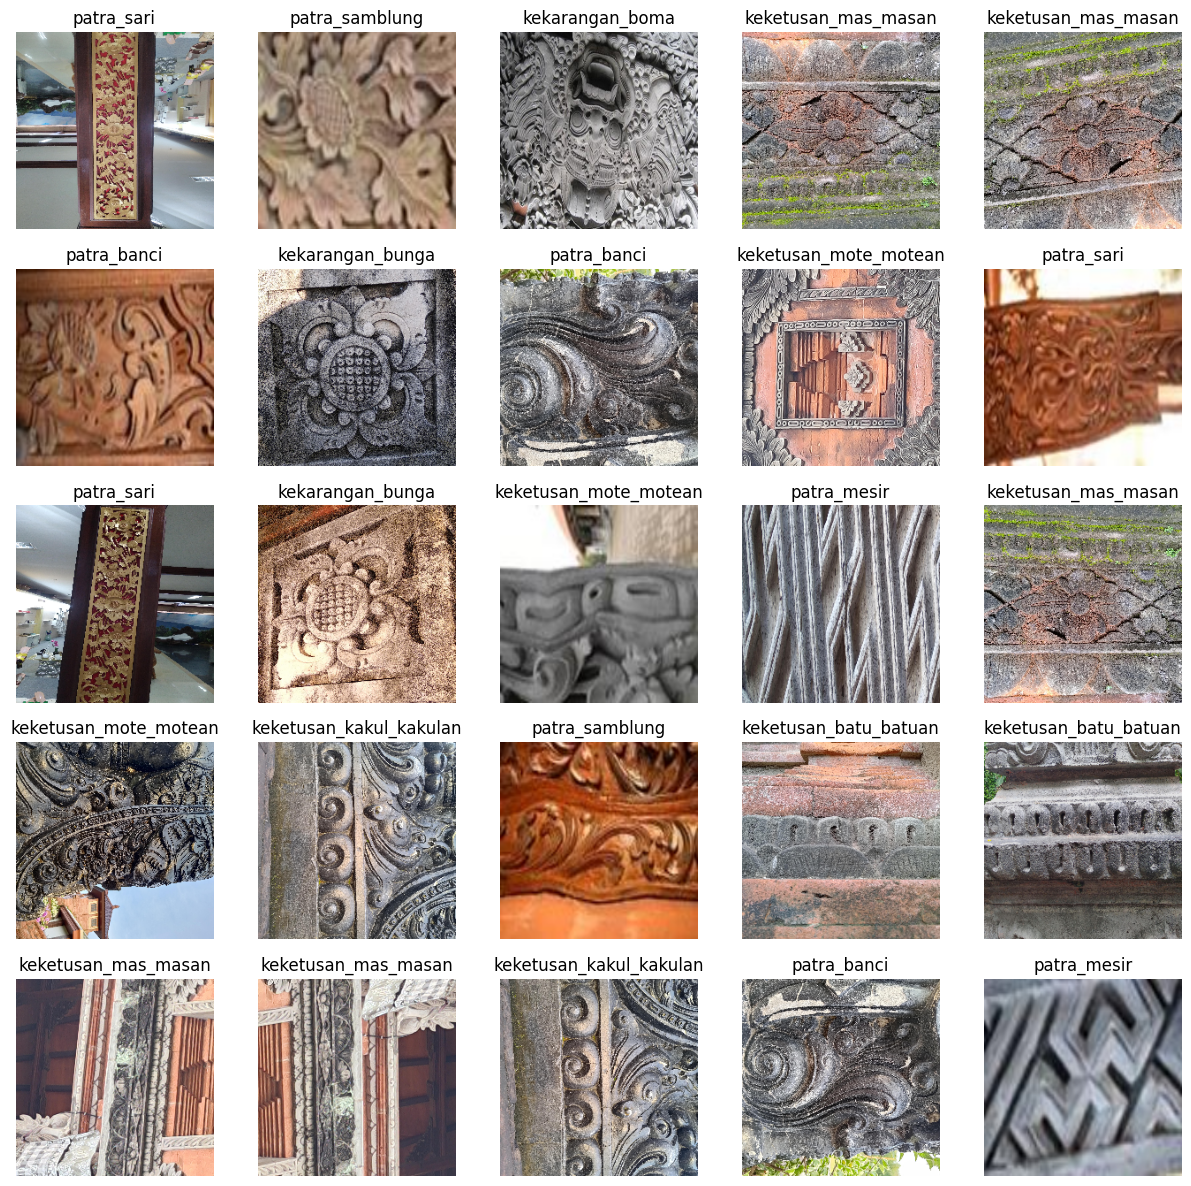

In [10]:
# PLOT/TAMPILKAN DATASET
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 5     # ⚠️ SESUAIKAN ⚠️
ncols = 5     # ⚠️ SESUAIKAN ⚠️
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(13, 13))
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
    for j in range(ncols):
        temp = i*ncols+j                # Index looping
        ax[i,j].imshow(X_train[temp])
        if y_train[temp] == 0:
            judul = "kekarangan_boma"
        elif y_train[temp] == 1:
            judul = "kekarangan_bunga"
        elif y_train[temp] == 2:
            judul = "kekarangan_gajah"
        elif y_train[temp] == 3:
            judul = "kekarangan_goak"
        elif y_train[temp] == 4:
            judul = "kekarangan_tapel"
        elif y_train[temp] == 5:
            judul = "keketusan_batu_batuan"
        elif y_train[temp] == 6:
            judul = "keketusan_kakul_kakulan"
        elif y_train[temp] == 7:
            judul = "keketusan_mas_masan"
        elif y_train[temp] == 8:
            judul = "keketusan_mote_motean"
        elif y_train[temp] == 9:
            judul = "patra_banci"
        elif y_train[temp] == 10:
            judul = "patra_mesir"
        elif y_train[temp] == 11:
            judul = "patra_pipid"
        elif y_train[temp] == 12:
            judul = "patra_samblung"
        elif y_train[temp] == 13:
            judul = "patra_sari"
        ax[i,j].set_title(judul)        # Show labels
        ax[i,j].axis('off')             # Hide axis
plt.show()

In [11]:
# Data final yang akan digunakan
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)

X_train_norm     : (1400, 224, 224, 3)
y_train_encode   : (1400, 14)


In [12]:
os.mkdir("/content/save_model")

In [13]:
print("Ukuran X_train:", X_train.shape)
print("Ukuran y_train:", y_train.shape)

Ukuran X_train: (1400, 224, 224, 3)
Ukuran y_train: (1400,)


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers
import pandas as pd
import gc
import tensorflow as tf
import numpy as np

def define_model_mobilenetv2():
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    base_model.trainable = False
    base_model.summary()
    plot_model(base_model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.2)) # Tambahkan dropout di sini
    model.add(Dense(14, activation='softmax', kernel_regularizer=regularizers.l2(0.01))) # Tambahkan regularisasi L2 di sini
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model(dataX, dataY, n_folds=5):
    epochs = 10
    batch_size = 64

    scores, histories = list(), list()
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=1)

    model = define_model_mobilenetv2()

    i = 0
    for train_ix, val_ix in kfold.split(dataX):
        i += 1
        trainX, trainY, valX, valY = X_train[train_ix], y_train[train_ix], X_train[val_ix], y_train[val_ix]

        # Mengompilasi dan melatih model pada GPU
        with tf.device('/GPU:0'):
            history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(valX, valY), verbose=1)

        _, acc = model.evaluate(valX, valY, verbose=0)
        print('\nAkurasi Fold ke-' + str(i) + ' = %.3f' % (acc * 100.0))

        scores.append(acc)
        histories.append(history)

        model.save("/content/simpan_model/model_fold_" + str(i) + ".h5")
        model_csv = pd.DataFrame(history.history)
        model_csv.to_csv("/content/simpan_model/model_fold_" + str(i) + ".csv", index=False)

        del trainX
        del trainY
        del valX
        del valY
        gc.collect()

    return scores, histories

# Contoh penggunaan
# Pastikan X_train_norm dan y_train_encode telah didefinisikan dan berisi data yang valid
# Melakukan split data menjadi train dan validation dengan rasio 80% untuk data train dan 20% untuk data validation
X_train, X_val, y_train, y_val = train_test_split(X_train_norm, y_train_encode, test_size=0.2, random_state=42)

# Evaluasi model menggunakan data yang telah displit
scores, histories = evaluate_model(X_train, y_train)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

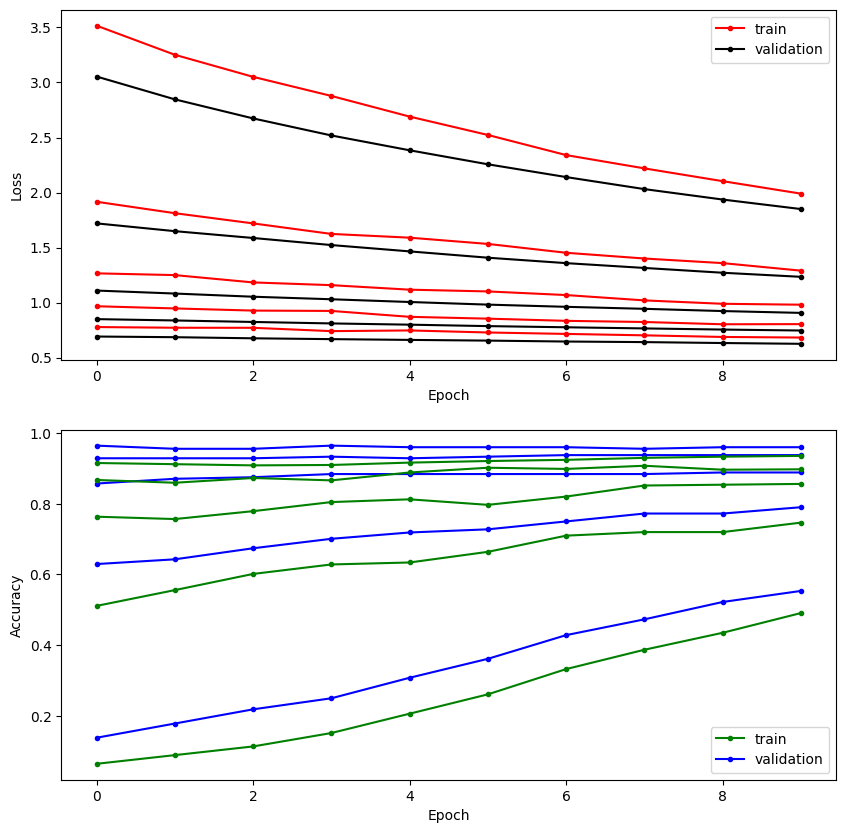

In [66]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_combine(histories):
    plt.figure(figsize=(10,10))

    for i in range(len(histories)):
        # plot loss
        plt.subplot(211) # 2 baris, 1 kolom, index ke-1
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='red', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='black', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # plot accuracy
        plt.subplot(212) # 2 baris, 1 kolom, index ke-2
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='green', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='blue', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='lower right')
    plt.show()

summarize_diagnostics_combine(histories)

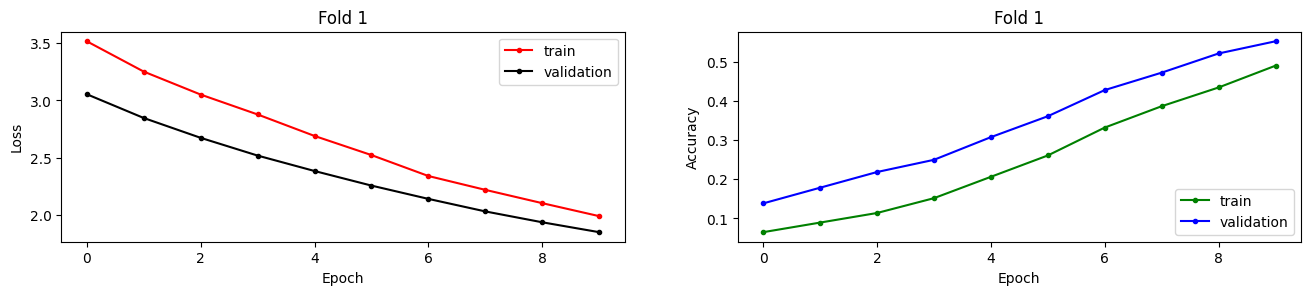

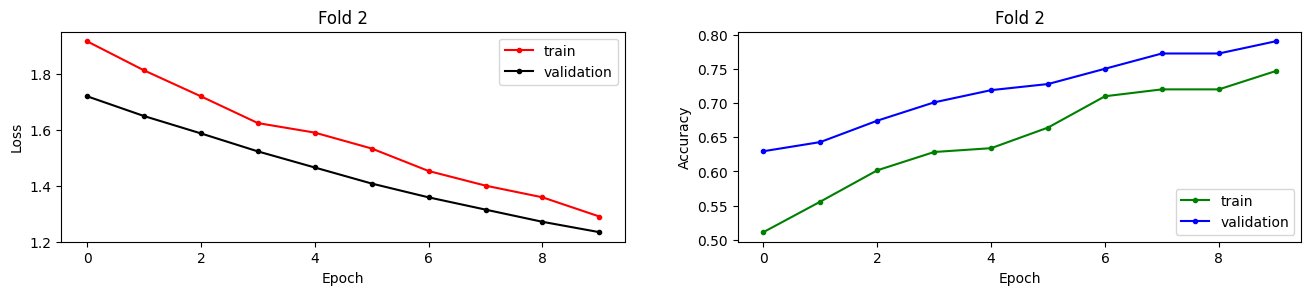

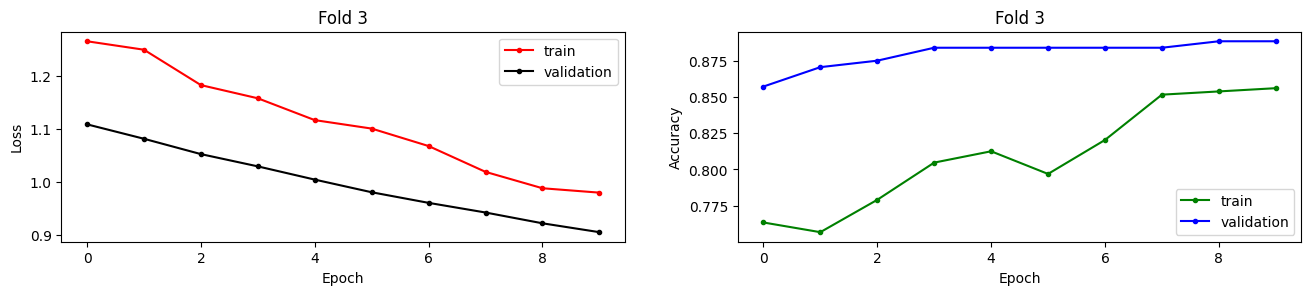

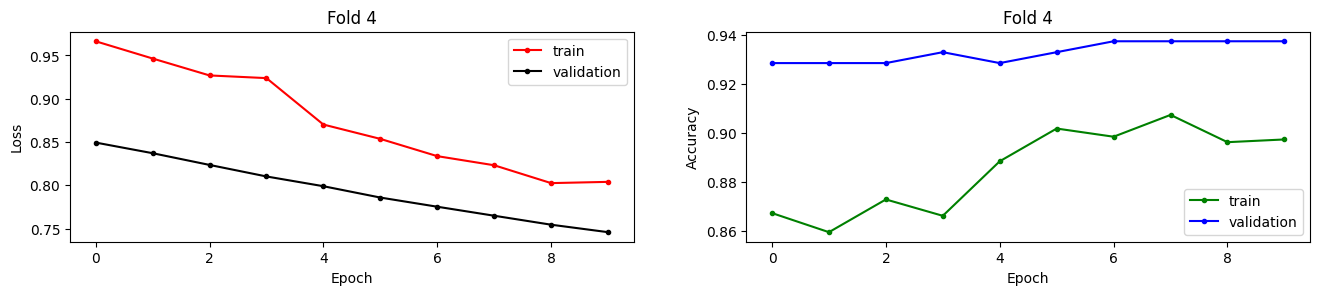

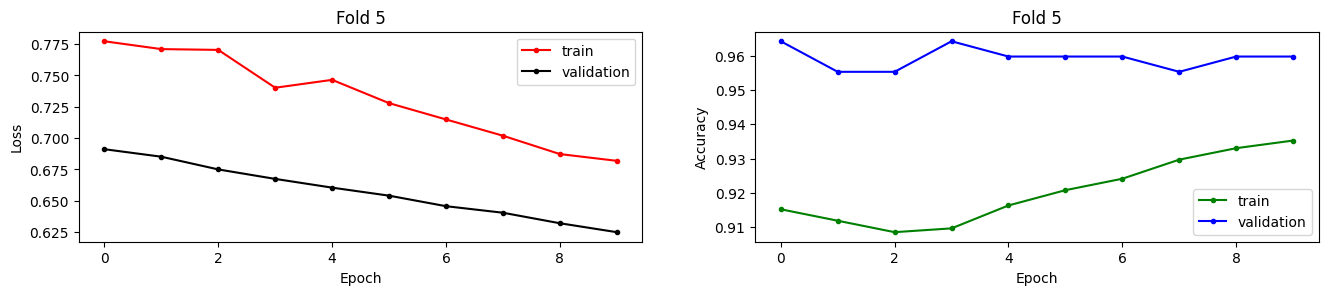

In [67]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories):
    for i in range(len(histories)):
        plt.figure(figsize=(16,6))

        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='red', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='black', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='green', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='blue', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='lower right')
        plt.show()

summarize_diagnostics_single(histories)

Accuracy: mean=82.589 std=14.814, n=5


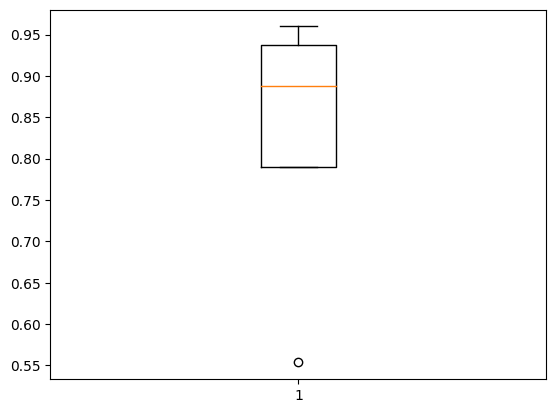

In [68]:
from numpy import mean
from numpy import std

def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

# summarize estimated performance
summarize_performance(scores)

In [69]:
# Bersihkan model sebelumnya (RAM cleaner)
if "model" in globals():
  del model
  gc.collect()

# Load model
from keras.models import load_model
# Masukkan path model yang dipilih
model = load_model('/content/simpan_model/model_fold_5.h5') # ⚠️ SESUAIKAN ⚠️
#model.summary()

9/9 [==============================] - 1s 49ms/step


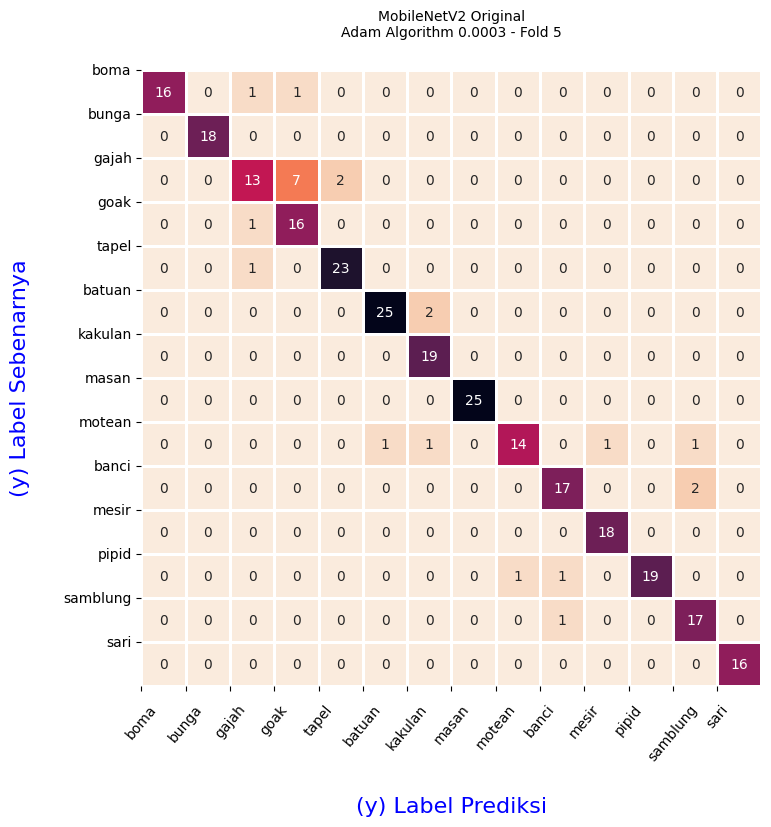

9/9 [==============================] - 0s 38ms/step

Classification Report:

              precision    recall  f1-score   support

        boma       1.00      0.89      0.94        18
       bunga       1.00      1.00      1.00        18
       gajah       0.81      0.59      0.68        22
        goak       0.67      0.94      0.78        17
       tapel       0.92      0.96      0.94        24
      batuan       0.96      0.93      0.94        27
     kakulan       0.86      1.00      0.93        19
       masan       1.00      1.00      1.00        25
      motean       0.93      0.78      0.85        18
       banci       0.89      0.89      0.89        19
       mesir       0.95      1.00      0.97        18
       pipid       1.00      0.90      0.95        21
    samblung       0.85      0.94      0.89        18
        sari       1.00      1.00      1.00        16

    accuracy                           0.91       280
   macro avg       0.92      0.92      0.91       280
wei

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

def generate_confusion_matrix(model, dataX, dataY):
    y_pred = model.predict(dataX)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(dataY, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    return cm

def plot_confusion_matrix(cmatrix, target_names):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cmatrix, cmap="rocket_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False)
    plt.title('MobileNetV2 Original\nAdam Algorithm 0.0003 - Fold 5', fontsize=10, pad=24)
    plt.xlabel("(y) Label Prediksi", fontsize=16, color="blue", labelpad=24)
    plt.ylabel("(y) Label Sebenarnya", fontsize=16, color="blue", labelpad=24)
    plt.xticks(ticks=range(len(target_names)), labels=target_names, fontsize=10, rotation=50)
    plt.yticks(ticks=range(len(target_names)), labels=target_names, fontsize=10, rotation=0)
    plt.tick_params(axis='x', pad=8)
    plt.ylim(len(target_names), 0)
    plt.show()

def print_classification_report(true_label, pred_label, target_names):
    creport = classification_report(true_label, pred_label, target_names=target_names)
    print("\nClassification Report:\n")
    print(creport)

# Contoh penggunaan
# Pastikan model telah dilatih dan data validasi (X_val, y_val) telah didefinisikan

# Menghasilkan confusion matrix
cmatrix = generate_confusion_matrix(model, X_val, y_val)

# Menentukan daftar nama kelas target
target_names = ['boma', 'bunga', 'gajah', 'goak', 'tapel', 'batuan', 'kakulan', 'masan', 'motean', 'banci', 'mesir', 'pipid', 'samblung', 'sari']

# Menampilkan confusion matrix dalam bentuk gambar
plot_confusion_matrix(cmatrix, target_names)

# Memprediksi label
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)

# Menampilkan classification report
print_classification_report(np.argmax(y_val, axis=1), y_pred, target_names)

In [71]:
# Import ke GCollab
import pandas as pd

# 01 - Save model as h5
model.save('MODEL-12-04-2024.h5') # ⚠️ SESUAIKAN ⚠️

# 02 - Save model report to csv
#model_csv = pd.DataFrame(history.history)
#csv_file = "final_model.csv"
#with open(csv_file, mode="w") as f:
#    model_csv.to_csv(f)

In [72]:
# BIKIN PREDIKSI #
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# load and prepare the image
def load_image(filename):
    img_size_224p = 224
    img = load_img(filename, target_size=(img_size_224p, img_size_224p))
    plt.imshow(img)
    plt.axis("off")
    img = img_to_array(img)
    img = img.reshape(-1, img_size_224p, img_size_224p, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img

def run_example(new_data_path):
    # load the image
    img = load_image(new_data_path)
    # load model
    model = load_model('/content/MODEL-12-04-2024.h5')  # ganti dengan path model yang benar
    # predict the class
    result = model.predict(img)
    predicted_class = np.argmax(result, axis=-1)

    if predicted_class == 0:
        print("Hasil Prediksi: Karang Boma")
    elif predicted_class == 1:
        print("Hasil Prediksi: Karang Bunga")
    elif predicted_class == 2:
        print("Hasil Prediksi: Karang Gajah")
    elif predicted_class == 3:
        print("Hasil Prediksi: Karang Goak")
    elif predicted_class == 4:
        print("Hasil Prediksi: Karang Tapel")
    elif predicted_class == 5:
        print("Hasil Prediksi: Batu Batuan")
    elif predicted_class == 6:
        print("Hasil Prediksi: Kakul Kakulan")
    elif predicted_class == 7:
        print("Hasil Prediksi: Mas Masan")
    elif predicted_class == 8:
        print("Hasil Prediksi: Mote Motean")
    elif predicted_class == 9:
        print("Hasil Prediksi: Patra Banci")
    elif predicted_class == 10:
        print("Hasil Prediksi: Patra Mesir")
    elif predicted_class == 11:
        print("Hasil Prediksi: Patra Pipid")
    elif predicted_class == 12:
        print("Hasil Prediksi: Patra Samblung")
    elif predicted_class == 13:
        print("Hasil Prediksi: Patra Sari")

1/1 [==============================] - 1s 708ms/step
Hasil Prediksi: Patra Pipid


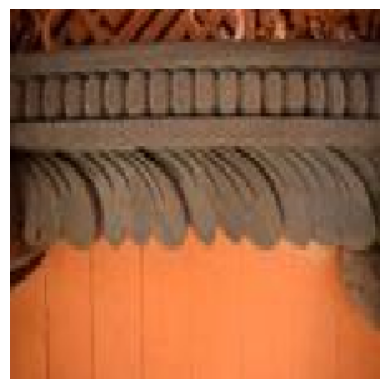

In [75]:
new_data_path = '/content/ta-dataset-ukiran-bali/patra_pipid/Pipid_016.jpg'
run_example(new_data_path)